# Example for running regression results

See $ROOTSYS/tutorials/tmva/TMVARegressionApplication.C for more details.
First get the path to the classes. The environment variable HSCODE must be set in your shell setup file (.bashrc or .tchsrc,....)
 Load/compile the hsmva classes via ROOTs ACLiC (clang-based compiler)


In [1]:
gROOT->ProcessLine(".x $HSCODE/hsmva/LoadHSMVA.C+");

Get the TMVA tutorial data files and load the variables and target into a tree

In [3]:
%%cpp -d
#include "GetTutorialFile.h"

In [4]:
TFile* infile=GetRegressionFile();
auto tree=(TTree*)infile->Get("TreeR");
tree->Print();

Info in <TFile::OpenFromCache>: using local cache copy of http://root.cern.ch/files/tmva_reg_example.root [./files/tmva_reg_example.root]


--- TMVARegression           : Using input file: ./files/tmva_reg_example.root
******************************************************************************
*Tree    :TreeR     : TreeR                                                  *
*Entries :    10000 : Total =          122500 bytes  File  Size =     108786 *
*        :          : Tree compression factor =   1.11                       *
******************************************************************************
*Br    0 :var1      : var1/F                                                 *
*Entries :    10000 : Total  Size=      40717 bytes  File Size  =      28684 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.12     *
*............................................................................*
*Br    1 :var2      : var2/F                                                 *
*Entries :    10000 : Total  Size=      40717 bytes  File Size  =      28680 *
*Baskets :        1 : Basket Size=      32000 bytes 

Create the MVA result and add its response to the tree

In [5]:
ResultByTree result("/work/dump/TMVARegressionTut","MLP",tree,kTRUE);
result.AddToTree();
result.Tree()->Print();

 ResultInterface::SetBranchAddresses found branches : 
   double 0
   float 2
   long 0
   int 0
   total vars in reader are 2
                         : Booking "MLP" of type "MLP" from /work/dump/TMVARegressionTut/weights/TMVARegressionTut_MLP.weights.xml.
                         : Reading weight file: /work/dump/TMVARegressionTut/weights/TMVARegressionTut_MLP.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Regression"
<HEADER> MLP                      : Building Network. 
                         : Initializing weights
                         : Booked classifier "MLP" of type: "MLP"
fvalue 0
HS::MVA::ResultInterface processed 10000 events 
******************************************************************************
*Tree    :TreeR     : TreeR                                                  *
*Entries :    10000 : Total =          163212 bytes  File  Size =     115059 *
*        :          : Tree compression factor =   1.11                       *
******

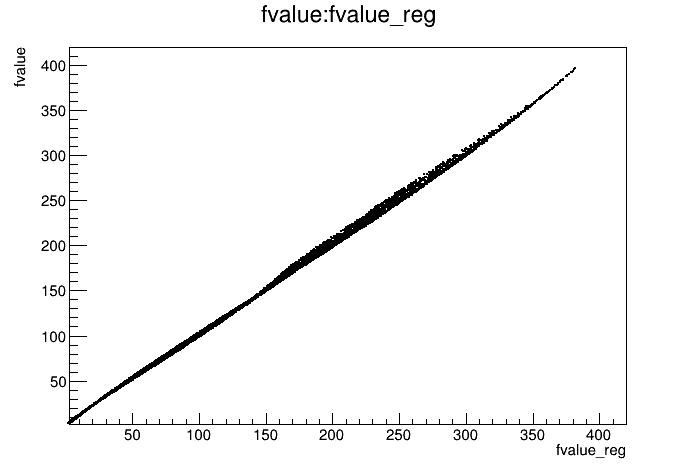

In [7]:
result.Tree()->Draw("fvalue:fvalue_reg");
c1->Draw(); //default first canvas name is c1 ...